In [44]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas



In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [5]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()


In [7]:
# Create a DataFrame with the scaled data
normalized_market_data = scaler.fit_transform(market_data_df) 
normalized_market_data_df = pd.DataFrame(normalized_market_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
crypto_names = market_data_df.index.copy()
normalized_market_data_df['coin_id'] = crypto_names
# Set the coinid column as index
normalized_market_data_df.set_index('coin_id', inplace=True)

# Display sample data
normalized_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, n_init='auto', random_state=0)
    model.fit(normalized_market_data_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_dict = {'k': k_values,
                   'inertia': inertia
                   }

# Create a DataFrame with the data to plot the Elbow curve

elbow_data_df = pd.DataFrame(elbow_data_dict)
# Display the DataFrame
elbow_data_df

c:\Users\denno\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\denno\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\denno\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\denno\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: xlabel='k'>

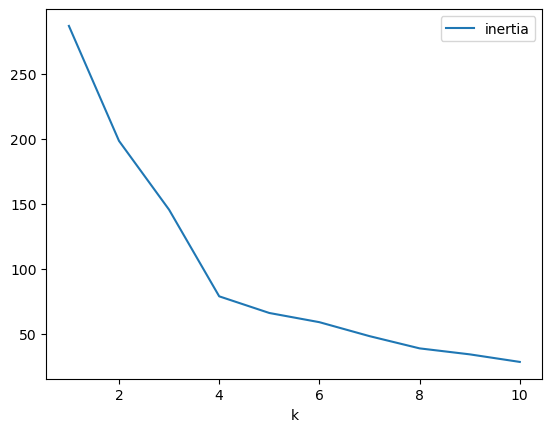

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_df.plot.line(x='k', y='inertia')

In [12]:
# Rate of decrease between the k values
k = elbow_data_df["k"]
inertia = elbow_data_df["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 30.81%
Percentage decrease from k=2 to k=3: 26.66%
Percentage decrease from k=3 to k=4: 45.74%
Percentage decrease from k=4 to k=5: 16.20%
Percentage decrease from k=5 to k=6: 10.69%
Percentage decrease from k=6 to k=7: 18.15%
Percentage decrease from k=7 to k=8: 19.45%
Percentage decrease from k=8 to k=9: 11.78%
Percentage decrease from k=9 to k=10: 16.94%


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Based on the rate of decrease between each k value, the best value for k is 4 because the rate of decrease in inertia from k=4 to k=5 is much smaller. That is also where the elbow point appears to be.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [13]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, n_init='auto', random_state=0)
k_model

KMeans(n_clusters=4, random_state=0)

In [14]:
# Fit the K-Means model using the scaled data
k_model.fit(normalized_market_data_df)

c:\Users\denno\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_cluster = k_model.predict(normalized_market_data_df)

# View the resulting array of cluster values.
crypto_cluster

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [16]:
# Create a copy of the DataFrame
normalized_prediction = normalized_market_data_df.copy()

In [17]:
# Add a new column to the DataFrame with the predicted clusters
normalized_prediction['crypto_cluster'] = crypto_cluster
# Display sample data
normalized_prediction.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

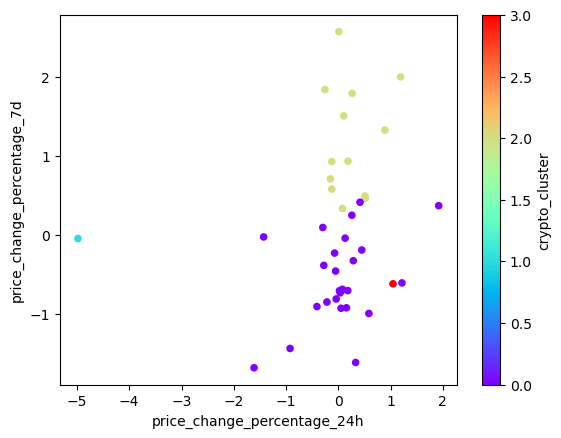

In [19]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
normalized_prediction.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c='crypto_cluster', colormap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)
pca_model

PCA(n_components=3)

In [21]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
normalized_df_pca = pca_model.fit_transform(normalized_market_data_df)

# View the first five rows of the DataFrame. 
normalized_df_pca[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [23]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca_model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is the sum of the components which is approximately 0.895 i.e 89.5%

In [ ]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(normalized_df_pca, columns=['PCA1', 'PCA2', 'PCA3'])
# Copy the crypto names from the original data
pca_df['coin_id'] = crypto_names
# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))
# Create an empty list to store the inertia values
inertia = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_means_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_means_model.fit(pca_df)
    inertia.append(k_means_model.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 
              'inertia': inertia}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
# Display the DataFrame
elbow_df.head()

c:\Users\denno\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\denno\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\denno\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\denno\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


<Axes: xlabel='k'>

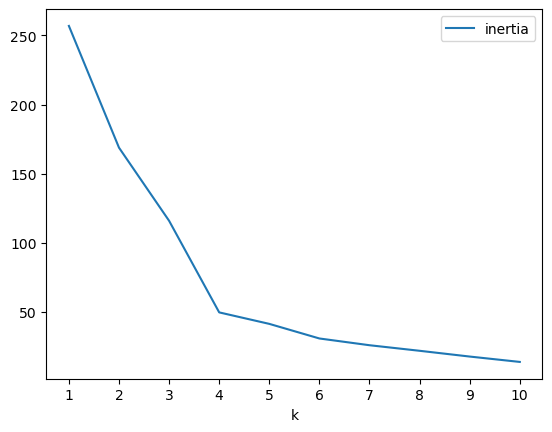

In [29]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x='k', y='inertia', xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Visually, the best value for k is 4, which is where the inertia starts to level off.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best values of k are the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [30]:
# Initialize the K-Means model using the best value for k
k_means_pca = KMeans(n_clusters=4, n_init='auto', random_state=0)

In [31]:
# Fit the K-Means model using the PCA data
k_means_pca.fit(pca_df)

c:\Users\denno\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [32]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_predictions = k_means_pca.predict(pca_df)

# Print the resulting array of cluster values.
pca_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [ ]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()
# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['crypto_cluster'] = pca_predictions
# Display sample data
pca_df_copy.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [45]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_df_copy.hvplot.scatter(x="PCA1", y="PCA2", c='crypto_cluster', colormap='winter')

:Scatter   [PCA1]   (PCA2,crypto_cluster)

### Determine the Weights of Each Feature on each Principal Component

In [37]:
# Use the columns from the original scaled DataFrame as the index.
pca_components_weights_df = pd.DataFrame(pca_model.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=normalized_market_data_df.columns)
pca_components_weights_df


,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Weights that are closer to  or -1 have the strongest positive or negative influence on each component respectively. Weights that are closer to 0 have the least influencce on their components. For PCA1, it is price change percentages for 200 days and 1 year. For PCA2, it is the price changes for 14 days and 30 days. For PCA3, it is price changes percentage for 7 days
    